# Hyperparameter Optimization | max_depth
***
### My dependancies

In [117]:
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [118]:
# Reading in the data in from the CSV in the data folder using pandas
breast_cancer_data = pd.read_csv("./data/breast_cancer_data.csv")
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Random depths  
Let's create an array of depths ranging from 1-30 to check our model against. We'll record the training and testing accuracy calculated at each depth and also plot the corresponding data to understand the max_depth value that results in the highest test accuracy while trying to minimize overfitting.

Since there are a maximum of 30 features, the max depth of the tree can be 30.

In [119]:
test_depths = range(1,30)
test_depths

range(1, 30)

We also need to split our data into a test and training set. We will do this using sckit learn's train_test_split method. By default, the data set is shuffled and then split with the train_test_split method

In [120]:
# Let's separate the features from the target
features_X = breast_cancer_data.drop(columns = ['id','diagnosis', 'Unnamed: 32'])
target_y = breast_cancer_data[['diagnosis']]

In [121]:
# Let's create our train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_X, target_y, test_size=0.2)

Now, the idea is to repeat the training and testing of the same training and testing data set for different values of the hyperparameter of **max_depth**. We'll do this by writing a loop that iterates over all the **test_depths**

In [122]:
training_scores = []
test_scores = []
breast_cancer_malignancy_classifier = DecisionTreeClassifier
for depth in test_depths:
    breast_cancer_malignancy_classifier = DecisionTreeClassifier(max_depth = depth)
    breast_cancer_malignancy_classifier.fit(X_train, y_train)
    breast_cancer_malignancy_classifier.predict(X_train)
    training_scores.append(breast_cancer_malignancy_classifier.score(X_train, y_train))
    breast_cancer_malignancy_classifier.predict(X_test)
    test_scores.append(breast_cancer_malignancy_classifier.score(X_test, y_test))


print(training_scores)

[0.9230769230769231, 0.9472527472527472, 0.9648351648351648, 0.9934065934065934, 0.9978021978021978, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [123]:
print(test_scores)

[0.8859649122807017, 0.9385964912280702, 0.9210526315789473, 0.956140350877193, 0.956140350877193, 0.9298245614035088, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9473684210526315, 0.956140350877193, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9385964912280702]


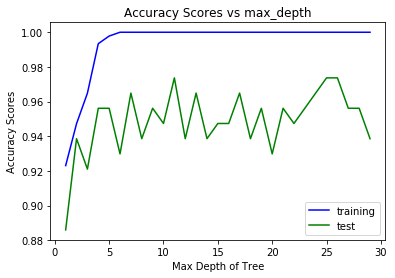

In [124]:
# Let's plot the values to see what's happening visually as well
plt.plot(test_depths,training_scores, color = 'blue')
plt.plot(test_depths,test_scores, color = 'green')
plt.title("Accuracy Scores vs max_depth")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Accuracy Scores")
plt.legend(labels = ['training','test'])

In [86]:
accuracy_data = pd.DataFrame(columns=['depth', 'training_score', 'test_score'])

In [87]:
accuracy_data['depth'] = test_depths
accuracy_data['training_score'] = training_scores
accuracy_data['test_score'] = test_scores
accuracy_data

,depth,training_score,test_score
0,1,0.927473,0.885965
1,2,0.938462,0.903509
2,3,0.967033,0.947368
3,4,0.978022,0.973684
4,5,0.986813,0.973684
5,6,0.991209,0.973684
6,7,0.997802,0.982456
7,8,1.000000,0.982456
8,9,1.000000,0.947368
9,10,1.000000,0.964912


In [88]:
max_test_score = max(test_scores)
max_test_score

0.9824561403508771

After repeating the above experiment multiple times, it appears that the highest test accuracy we've been able to achieve is 98.25% while at a max depth of 7.  

However, I would also like to point out, for certain splits, using the train_test_split method resulted in splits that resulted in models that performed much more poorly on the test data with the highest accuracy of these models being 88.56% around the 6 to 7 depth mark.  

From the plot above, it is also clear that the behavior of the decision tree is rather eratic, and may be we can try to adjust the min_sample_split for depth 7 to see if we can improve the test accuracy while also creating a more stable model.  

## Optimum Hyperparameter | max_depth = 7
***

# Hyperparameter Optimization | min_sample_split
Let's generate an array of random split sizes

In [222]:
random_min_sample_splits = np.random.randint(low=2, high=60, size=30)
random_min_sample_splits.sort()
random_min_sample_splits

array([ 5,  6,  6, 10, 10, 15, 16, 18, 19, 20, 21, 22, 22, 22, 23, 25, 29,
       31, 31, 35, 35, 35, 38, 39, 46, 47, 48, 51, 52, 59])

In [223]:
training_scores2 = []
test_scores2 = []
breast_cancer_malignancy_classifier = DecisionTreeClassifier
for val in random_min_sample_splits:
    breast_cancer_malignancy_classifier = DecisionTreeClassifier(max_depth = 7, min_samples_split = val)
    breast_cancer_malignancy_classifier.fit(X_train, y_train)
    breast_cancer_malignancy_classifier.predict(X_train)
    training_scores2.append(breast_cancer_malignancy_classifier.score(X_train, y_train))
    breast_cancer_malignancy_classifier.predict(X_test)
    test_scores2.append(breast_cancer_malignancy_classifier.score(X_test, y_test))


print(training_scores2)

[0.9978021978021978, 0.9956043956043956, 0.9956043956043956, 0.9934065934065934, 0.9934065934065934, 0.9714285714285714, 0.9692307692307692, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516, 0.9516483516483516]


In [224]:
print(test_scores2)

[0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9649122807017544, 0.9210526315789473, 0.9210526315789473, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088]


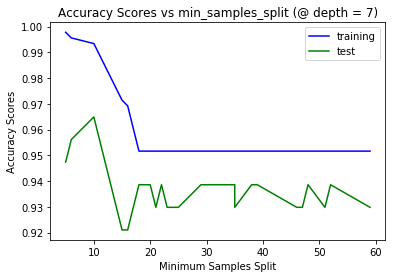

In [225]:
# Let's plot the values to see what's happening visually as well
plt.plot(random_min_sample_splits,training_scores2, color = 'blue')
plt.plot(random_min_sample_splits,test_scores2, color = 'green')
plt.title("Accuracy Scores vs min_samples_split (@ depth = 7)")
plt.xlabel("Minimum Samples Split")
plt.ylabel("Accuracy Scores")
plt.legend(labels = ['training','test'])

In [226]:
accuracy_data2 = pd.DataFrame(columns = ['splits', 'training_score', 'test_score'])
accuracy_data2['splits'] = random_min_sample_splits
accuracy_data2['training_score'] = training_scores2
accuracy_data2['test_score'] = test_scores2
accuracy_data2

,splits,training_score,test_score
0,5,0.997802,0.947368
1,6,0.995604,0.956140
2,6,0.995604,0.956140
3,10,0.993407,0.964912
4,10,0.993407,0.964912
5,15,0.971429,0.921053
6,16,0.969231,0.921053
7,18,0.951648,0.938596
8,19,0.951648,0.938596
9,20,0.951648,0.938596


In [227]:
max_test_score2 = max(test_scores2)
max_test_score2

0.9649122807017544

Considering that the min_sample_split doesn't restrict the maximum number of sample splits, I would default to a smaller value of min_sample_split to allow the model more freedom to pick the best or optimal split size. The plot shows that the accuracy drops as the min_sample_split rises, which is expected. Hence I would pick a value of 2 for the min_sample_split.  
***
## Optimum Hyperparameter | min_sample_split = 2